In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import joblib
import uuid
import itertools
import keras_tuner as kt

from sklearn.metrics import confusion_matrix


In [2]:
uniqueid = uuid.uuid4().int & (1 << 64)-1


In [3]:
use_pre_trained_embeds = False

In [4]:
dataset_dir = "imdb"
# dataset_dir = "sentiment140"
# dataset_dir = "coronaNLP"

model_dir = "models"
visuals_dir = "visuals"
tokenizers_dir = "tokenizers"

# load a preprocessed dataframe see: (https://github.com/3nws/twitter-text-classification/blob/main/notebooks/process_dataframes.ipynb)
df = joblib.load(f"../dataframes/df_{dataset_dir}.pkl") 

In [5]:
df.columns=["text", "sentiment"]

In [6]:
# df = df[730000:850000] if dataset_dir == "sentiment140" else df

In [7]:
df.shape

(49582, 2)

In [8]:
df.head()

,text,sentiment
0,one review mention watch 1 oz episod youll hoo...,1
1,wonder littl product br br film techniqu veri ...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


In [9]:

# import seaborn as sns

# sns.countplot(df.sentiment)


In [10]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(df.text)


In [11]:
len(counter)

143417

In [12]:
counter

Counter({'one': 52900,
         'review': 4159,
         'mention': 2966,
         'watch': 27016,
         '1': 2503,
         'oz': 261,
         'episod': 4789,
         'youll': 2603,
         'hook': 571,
         'right': 6744,
         'exact': 2332,
         'happen': 6883,
         'mebr': 449,
         'br': 112957,
         'first': 17171,
         'thing': 15975,
         'struck': 266,
         'brutal': 914,
         'unflinch': 39,
         'scene': 20554,
         'violenc': 1988,
         'set': 7486,
         'word': 3531,
         'go': 17594,
         'trust': 706,
         'show': 19169,
         'faint': 134,
         'heart': 2613,
         'timid': 55,
         'pull': 1831,
         'punch': 524,
         'regard': 934,
         'drug': 1629,
         'sex': 3193,
         'hardcor': 250,
         'classic': 4110,
         'use': 9979,
         'wordbr': 15,
         'call': 5393,
         'nicknam': 83,
         'given': 3521,
         'oswald': 31,
         '

In [13]:
counter.most_common(5)

[('br', 112957),
 ('movi', 98208),
 ('film', 91427),
 ('one', 52900),
 ('like', 43621)]

In [14]:
num_unique_words = len(counter)

In [15]:
# Split dataset into training and validation set

from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 0], df.iloc[:, 1]

train_sentences, val_sentences, train_labels, val_labels = train_test_split(X, y, test_size=0.3, stratify=y ,random_state=42)

train_sentences = train_sentences.to_numpy()
val_sentences = val_sentences.to_numpy()
train_labels = train_labels.to_numpy()
val_labels = val_labels.to_numpy()


In [16]:
train_sentences.shape, val_sentences.shape, train_labels.shape, val_labels.shape


((34707,), (14875,), (34707,), (14875,))

In [17]:
type(train_sentences), type(val_sentences), type(train_labels), type(val_labels),

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [18]:
train_sentences[:1], train_labels[:1]

(array(['work librari expect like movi came 5 year ago well like parker posey lot shes wonder actress omar townsend realli cute boyfriend couldnt act look like care movi bad wasnt funni cute much anyth posey kept movi afloat energi learn dewey decim system overnight shelv ton book beat music come also problem way look becam fullfledg librarian endhair bun glass sens humorcan let stereotyp go pleas worth see posey townsend tv seri much better'],
       dtype=object),
 array([1]))

In [19]:
num_unique_words


143417

In [20]:
# Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

max_features = 50000
# max_features = num_unique_words

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_sentences) # fit only to training

In [21]:
# each word has unique index
word_index = tokenizer.word_index

In [22]:
word_index

{'br': 1,
 'movi': 2,
 'film': 3,
 'one': 4,
 'like': 5,
 'time': 6,
 'good': 7,
 'make': 8,
 'see': 9,
 'charact': 10,
 'get': 11,
 'veri': 12,
 'watch': 13,
 'even': 14,
 'stori': 15,
 'would': 16,
 'onli': 17,
 'realli': 18,
 'scene': 19,
 'show': 20,
 'look': 21,
 'bad': 22,
 'well': 23,
 'much': 24,
 'great': 25,
 'end': 26,
 'go': 27,
 'also': 28,
 'peopl': 29,
 'love': 30,
 'becaus': 31,
 'first': 32,
 'think': 33,
 'act': 34,
 'play': 35,
 'dont': 36,
 'way': 37,
 'thing': 38,
 'made': 39,
 'could': 40,
 'ani': 41,
 'know': 42,
 'seem': 43,
 'say': 44,
 'mani': 45,
 'actor': 46,
 'come': 47,
 'plot': 48,
 'seen': 49,
 'take': 50,
 'want': 51,
 'work': 52,
 'never': 53,
 'two': 54,
 'tri': 55,
 'best': 56,
 'littl': 57,
 'year': 58,
 'life': 59,
 'ever': 60,
 'doe': 61,
 'give': 62,
 'man': 63,
 'better': 64,
 'still': 65,
 'find': 66,
 'perform': 67,
 'whi': 68,
 'part': 69,
 'feel': 70,
 'use': 71,
 'actual': 72,
 'someth': 73,
 'lot': 74,
 'back': 75,
 'interest': 76,
 'im': 

In [23]:
len_of_vocab = len(word_index)

In [24]:
len_of_vocab, max_features


(115303, 50000)

In [25]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

In [26]:
print(train_sentences[14:15])
print(train_sequences[14:15])

['typic 70s italian come age film origin good music quirk interest fantast photographi poor time confus storylin eg role wolfdog doe boy come poor dialogu nice ambiancebr br reason still relat wellknown sought probabl nude scene includ typic 70s pseudocoitus involv 11 13 year old girl older teenag boy eva ionesco laura wendel interest sociopolit point view see represent veri young adolesc consid accept normal whole europ us 30 year ago wherea taboobr br stori revolv round bulli one girl laura two charact discoveri sex quit accur represent aspect teenag life charact eva silvia doe evolv veri end film alreadi appear veri vers erot art come age veri vain young girl alreadi awar sexual charm ultim use end film cri like littl girl realli still boy utter despic bulli laura come across veri naiv weak victim']
[[618, 944, 942, 47, 399, 3, 103, 7, 92, 6250, 76, 717, 1204, 195, 6, 583, 679, 2313, 91, 48062, 61, 247, 47, 195, 351, 231, 35881, 1, 153, 65, 509, 3884, 5739, 172, 2327, 19, 276, 618, 

In [27]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = max([len(text) for text in train_sequences]) if dataset_dir == "sentiment140" else 32
max_length

32

In [28]:

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape

((34707, 32), (14875, 32))

In [29]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_padded, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_padded, val_labels))


In [30]:
len(train_dataset), len(val_dataset)


(34707, 14875)

In [31]:
BATCH_SIZE = 64
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [32]:
train_dataset, val_dataset


(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 32), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 32), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [33]:
# Check reversing the indices

# flip (key, value)
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

In [34]:
reverse_word_index

{1: 'br',
 2: 'movi',
 3: 'film',
 4: 'one',
 5: 'like',
 6: 'time',
 7: 'good',
 8: 'make',
 9: 'see',
 10: 'charact',
 11: 'get',
 12: 'veri',
 13: 'watch',
 14: 'even',
 15: 'stori',
 16: 'would',
 17: 'onli',
 18: 'realli',
 19: 'scene',
 20: 'show',
 21: 'look',
 22: 'bad',
 23: 'well',
 24: 'much',
 25: 'great',
 26: 'end',
 27: 'go',
 28: 'also',
 29: 'peopl',
 30: 'love',
 31: 'becaus',
 32: 'first',
 33: 'think',
 34: 'act',
 35: 'play',
 36: 'dont',
 37: 'way',
 38: 'thing',
 39: 'made',
 40: 'could',
 41: 'ani',
 42: 'know',
 43: 'seem',
 44: 'say',
 45: 'mani',
 46: 'actor',
 47: 'come',
 48: 'plot',
 49: 'seen',
 50: 'take',
 51: 'want',
 52: 'work',
 53: 'never',
 54: 'two',
 55: 'tri',
 56: 'best',
 57: 'littl',
 58: 'year',
 59: 'life',
 60: 'ever',
 61: 'doe',
 62: 'give',
 63: 'man',
 64: 'better',
 65: 'still',
 66: 'find',
 67: 'perform',
 68: 'whi',
 69: 'part',
 70: 'feel',
 71: 'use',
 72: 'actual',
 73: 'someth',
 74: 'lot',
 75: 'back',
 76: 'interest',
 77: 'i

In [35]:
word_index

{'br': 1,
 'movi': 2,
 'film': 3,
 'one': 4,
 'like': 5,
 'time': 6,
 'good': 7,
 'make': 8,
 'see': 9,
 'charact': 10,
 'get': 11,
 'veri': 12,
 'watch': 13,
 'even': 14,
 'stori': 15,
 'would': 16,
 'onli': 17,
 'realli': 18,
 'scene': 19,
 'show': 20,
 'look': 21,
 'bad': 22,
 'well': 23,
 'much': 24,
 'great': 25,
 'end': 26,
 'go': 27,
 'also': 28,
 'peopl': 29,
 'love': 30,
 'becaus': 31,
 'first': 32,
 'think': 33,
 'act': 34,
 'play': 35,
 'dont': 36,
 'way': 37,
 'thing': 38,
 'made': 39,
 'could': 40,
 'ani': 41,
 'know': 42,
 'seem': 43,
 'say': 44,
 'mani': 45,
 'actor': 46,
 'come': 47,
 'plot': 48,
 'seen': 49,
 'take': 50,
 'want': 51,
 'work': 52,
 'never': 53,
 'two': 54,
 'tri': 55,
 'best': 56,
 'littl': 57,
 'year': 58,
 'life': 59,
 'ever': 60,
 'doe': 61,
 'give': 62,
 'man': 63,
 'better': 64,
 'still': 65,
 'find': 66,
 'perform': 67,
 'whi': 68,
 'part': 69,
 'feel': 70,
 'use': 71,
 'actual': 72,
 'someth': 73,
 'lot': 74,
 'back': 75,
 'interest': 76,
 'im': 

In [36]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [37]:
decoded_text = decode(train_sequences[10])

print(train_sequences[10])
print(decoded_text)

[128, 4, 192, 2, 60, 8, 234, 4633, 1, 445, 602, 69, 178, 81, 443, 443, 443, 718, 1089, 118, 443, 1, 1, 244, 373, 74, 745, 394, 140, 5, 14, 166, 236, 19, 237, 113, 1, 1, 389, 34, 295, 21, 5, 193, 1702, 570, 2599, 501, 29, 106, 4742, 1, 484, 30, 215, 3539, 36, 444, 2, 42, 209, 3566, 78, 577, 2215, 213, 695, 10749, 13886, 872]
may one worst movi ever make product everbr br 1 excit part begin guy walk walk walk spoiler 15 minut walk br br 2 mention lot issu light almost like even shot night scene dure day br br 3 act terribl look like found communiti theater mexico took peopl turn awaybr br pleas love everyth holi dont rent movi know someon apolog director subject punish war crime tribun foist public


In [38]:
embedding_dim = 300
lstm_dim = embedding_dim//2


if use_pre_trained_embeds:
    embeddings_dictionary = dict()
    glove_file = open('../embeds/glove.6B.300d.txt', 'rb')

    for line in glove_file:
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions

    glove_file.close()

    embeddings_matrix = np.zeros((len_of_vocab, embedding_dim))
    for word, index in tokenizer.word_index.items():
        embedding_vector = embeddings_dictionary.get(
            bytes(word, 'utf-8'))
        if embedding_vector is not None:
            embeddings_matrix[index] = embedding_vector


In [39]:

from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional, SpatialDropout1D, Dropout, GlobalMaxPool1D, GlobalMaxPool2D, Convolution1D, Flatten
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import L1, L2
from keras import Model

In [40]:
# # remember to clear cache

# embedding_options = [32, 64, 128]
# lstm_options = [16, 32, 64]
# dense_options = [16, 32, 64]
# activation_options = ["relu", "tanh", "sigmoid"]


# def build_model(hp):
#     model = Sequential()
#     model.add(Embedding(max_features, output_dim=hp.Choice('output_dim', embedding_options),
#                         input_length=max_length, name="embeddinglayer"))
#     model.add(Bidirectional(
#         LSTM(units=hp.Choice('units_1', lstm_options), dropout=hp.Float("dropout", min_value=0,
#                                                                       max_value=0.6), return_sequences=True)))
#     model.add(Bidirectional(
#         LSTM(units=hp.Choice('units_2', lstm_options), dropout=hp.Float("dropout", min_value=0,
#                                                                       max_value=0.6))))
#     model.add(Dense(units=hp.Choice('units_3', dense_options), activation=hp.Choice("activation", activation_options),
#                     kernel_regularizer=L1(
#                         hp.Choice('l1', [0.01, 0.001, 0.1, 0.005, 0.05])),
#                     activity_regularizer=L2(hp.Choice('l2', [0.01, 0.001, 0.1, 0.005, 0.05]))))
#     model.add(Dense(units=hp.Choice('units_4', dense_options), activation=hp.Choice("activation", activation_options),
#                     kernel_regularizer=L1(
#                         hp.Choice('l1', [0.01, 0.001, 0.1, 0.005, 0.05])),
#                     activity_regularizer=L2(hp.Choice('l2', [0.01, 0.001, 0.1, 0.005, 0.05]))))
#     model.add(Dense(1, activation="sigmoid"))
#     loss = BinaryCrossentropy(from_logits=False)
#     optim = Adam(learning_rate=hp.Float("learning_rate", min_value=1e-4,
#                                         max_value=1e-2, sampling="log"))
#     metrics = [
#         "accuracy",
#     ]
#     model.compile(loss=loss, optimizer=optim, metrics=metrics)
#     return model


In [41]:
# tuner = kt.Hyperband(
#     build_model,
#     objective='val_accuracy',
#     max_epochs=10,
#     factor=3,
#     overwrite=True,
#     project_name='nn_model',
#     directory='tuners')


# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# terminate_on_nan = tf.keras.callbacks.TerminateOnNaN()

# tuner.search(train_dataset, epochs=3,
#              shuffle=True, validation_data=val_dataset, verbose=1, callbacks=[stop_early])

# best_model = tuner.get_best_models()[0]
# best_model

In [42]:
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# best_hps

In [43]:
# tuner.results_summary()

In [44]:
# hypertuned_model = tuner.hypermodel.build(best_hps)

# hypertuned_model.summary()

In [45]:
# type(embeddings_matrix[1][0])

In [46]:
# 'softmax' activation function returns a probability distribution and should be used with from_logits=False in categorical loss function
# if 'softmax' or 'sigmoid' then from_logits=False else from_logits=True
# Binary for 0-1, Categorical for 2 or more classes, SparseCategorical for when labels are integers
# Dropout is used to prevent overfitting by randomly setting inputs to 0 at a low rate
# For stacked LSTMs set return_sequences to True except for the last one
# trainable parameter in Embedding layer should still be set to True when using already trained weights (it is by default anyway)

# 0
def one():
    model = Sequential()
    model.add(Embedding(len_of_vocab, embedding_dim,
                        input_length=max_length, name="embeddinglayer", weights=[embeddings_matrix], trainable=False))
    model.add(Convolution1D(64, 3, padding='same'))
    model.add(Convolution1D(32, 3, padding='same'))
    model.add(Convolution1D(16, 3, padding='same'))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(180, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    loss = BinaryCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.001)
    metrics = [
        "accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 1
def two():
    model = Sequential()
    model.add(Embedding(len_of_vocab, embedding_dim,
                               input_length=max_length, name="embeddinglayer"))
    model.add(LSTM(embedding_dim, dropout=0.1))
    model.add(Dense(1, activation="sigmoid"))
    loss = BinaryCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.001)
    metrics = [
        "accuracy",
        "binary_accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model
    
# 2
def three():
    model = Sequential()
    model.add(Embedding(len_of_vocab, embedding_dim,
                               input_length=max_length, name="embeddinglayer"))
    model.add(LSTM(embedding_dim, dropout=0.1))
    model.add(Dense(2, activation="softmax"))
    loss = SparseCategoricalCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.001)
    metrics = [
        "accuracy",
        "sparse_categorical_accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 3
def four():
    model = Sequential()
    model.add(Embedding(len_of_vocab, embedding_dim,
                               input_length=max_length, name="embeddinglayer"))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.2)))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(2, activation="softmax"))
    loss = SparseCategoricalCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.001)
    metrics = [
        "accuracy",
        # "sparse_categorical_accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 4
def five():
    model = Sequential()
    model.add(Embedding(len_of_vocab, embedding_dim,
                        input_length=max_length, name="embeddinglayer"))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3, return_sequences=True)))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3)))
    model.add(Dense(32, activation="relu", kernel_regularizer=L1(0.01), activity_regularizer=L2(0.01)))
    model.add(Dense(2, activation="softmax"))
    loss = SparseCategoricalCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.0001)
    metrics = [
        "accuracy",
        "sparse_categorical_accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 5
def six():
    model = tf.keras.Sequential()
    model.add(Embedding(
        len_of_vocab, embedding_dim, input_length=max_length))
    model.add(SpatialDropout1D(0.4))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.05, recurrent_dropout=0.2)))
    model.add(Dense(2, activation='softmax'))
    loss = SparseCategoricalCrossentropy(from_logits=False)
    optim = Adam(learning_rate=0.001)
    metrics = ["accuracy",
               "sparse_categorical_accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 6
def seven():
    model = Sequential()
    model.add(Embedding(len_of_vocab, embedding_dim,
                        input_length=max_length, name="embeddinglayer", weights=[embeddings_matrix], trainable=True))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3, return_sequences=True)))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3)))
    model.add(Dense(32, activation="relu", kernel_regularizer=L1(0.01),
                    activity_regularizer=L2(0.01)))
    model.add(Dense(1, activation="sigmoid"))
    loss = BinaryCrossentropy(from_logits=False)
    optim = Adam(learning_rate=1e-4)
    metrics = [
        "accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 7
def eight():
    model = Sequential()
    model.add(Embedding(len_of_vocab, 128))
    model.add(Bidirectional(LSTM(32, return_sequences=True)))
    model.add(GlobalMaxPool1D())
    model.add(Dense(20, activation="relu"))
    model.add(Dropout(0.05))
    model.add(Dense(1, activation="sigmoid"))
    loss = BinaryCrossentropy(from_logits=False)
    optim = Adam(learning_rate=1e-4)
    metrics = [
        "accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 8
def nine():
    model = Sequential()
    model.add(Embedding(len_of_vocab, embedding_dim,
                        input_length=max_length, name="embeddinglayer"))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3, return_sequences=True)))
    model.add(Bidirectional(LSTM(lstm_dim, dropout=0.3)))
    model.add(Dense(32, activation="relu", kernel_regularizer=L1(0.01),
                    activity_regularizer=L2(0.01)))
    model.add(Dense(2, activation="softmax"))
    loss = SparseCategoricalCrossentropy(from_logits=False)
    optim = Adam(learning_rate=1e-4)
    metrics = [
        "accuracy",
    ]
    model.compile(loss=loss, optimizer=optim, metrics=metrics)
    return model

# 9
def ten():
    model = Sequential()
    model.add(Embedding(len_of_vocab, embedding_dim,
                        input_length=max_length, name="embeddinglayer", weights=[embeddings_matrix], trainable=True))
    # Convolutional model (3x conv, flatten, 2x dense)
    model.add(Convolution1D(64, 3, padding='same'))
    model.add(Convolution1D(32, 3, padding='same'))
    model.add(Convolution1D(16, 3, padding='same'))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(180, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['accuracy'])
    return model


In [47]:
max_features, embedding_dim, max_length, len_of_vocab


(50000, 300, 32, 115303)

In [50]:
models = [
    one,
    two,
    three,
    four,
    five,
    six,
    seven,
    eight,
    nine,
    ten
]

model_to_use = 8

model_idx = -1 if use_pre_trained_embeds else model_to_use


In [72]:
model = models[model_idx]()

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embeddinglayer (Embedding)  (None, 32, 300)           34590900  
                                                                 
 bidirectional_8 (Bidirectio  (None, 32, 300)          541200    
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 300)              541200    
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 32)                9632      
                                                                 
 dense_9 (Dense)             (None, 2)                 66        
                                                                 
Total params: 35,682,998
Trainable params: 35,682,998


In [73]:
from tensorflow import keras

# history = model.fit(train_dataset, epochs=15, batch_size=64, validation_data=val_dataset, verbose=1, callbacks=[
#                     keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-4, patience=1)])
history = model.fit(train_dataset, epochs=15, batch_size=64, validation_data=val_dataset, verbose=1)


Epoch 1/15
543/543 [==============================] - 46s 75ms/step - loss: 4.7819 - accuracy: 0.7256 - val_loss: 2.7908 - val_accuracy: 0.7953
Epoch 2/15
543/543 [==============================] - 40s 73ms/step - loss: 1.5206 - accuracy: 0.8417 - val_loss: 0.7420 - val_accuracy: 0.8024
Epoch 3/15
543/543 [==============================] - 40s 74ms/step - loss: 0.4352 - accuracy: 0.8851 - val_loss: 0.5387 - val_accuracy: 0.7964
Epoch 4/15
543/543 [==============================] - 40s 74ms/step - loss: 0.3413 - accuracy: 0.9105 - val_loss: 0.5520 - val_accuracy: 0.7901
Epoch 5/15
543/543 [==============================] - 40s 74ms/step - loss: 0.2969 - accuracy: 0.9288 - val_loss: 0.5741 - val_accuracy: 0.7880
Epoch 6/15
543/543 [==============================] - 40s 74ms/step - loss: 0.2629 - accuracy: 0.9412 - val_loss: 0.6251 - val_accuracy: 0.7844
Epoch 7/15
543/543 [==============================] - 40s 74ms/step - loss: 0.2349 - accuracy: 0.9510 - val_loss: 0.6501 - val_accuracy:

In [53]:

from sklearn.metrics import classification_report

train_pred = model.predict(train_padded)
train_pred = [np.argmax(train_pre) for train_pre in train_pred]
print(classification_report(train_labels, train_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     17288
           1       0.95      0.91      0.93     17419

    accuracy                           0.93     34707
   macro avg       0.93      0.93      0.93     34707
weighted avg       0.93      0.93      0.93     34707



In [54]:
from sklearn.metrics import roc_auc_score

val_pred = model.predict(val_padded)
val_pred = [np.argmax(val_pre) for val_pre in val_pred]
print("ROC AUC: ", roc_auc_score(val_labels, val_pred))

ROC AUC:  0.7921592261864409


In [55]:
from tensorboard.plugins import projector

In [56]:
%load_ext tensorboard

In [57]:
# # create logging directory
# log_dir='/logs/fit/'
# if not os.path.exists(log_dir):
#     os.makedirs(log_dir)

# # write wordindex dictionary
# with open(os.path.join(log_dir, 'metadata.tsv'), "w") as f:
#   for w in word_index:
#     f.write("{}\n".format(w))

# # weights from the embedding layer, in our case: model.layers[1]
# weights = tf.Variable(model.layers[1].get_weights()[0][1:])
# checkpoint = tf.train.Checkpoint(embedding=weights)
# checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))

# # configuration set-up
# config = projector.ProjectorConfig()
# embedding = config.embeddings.add()
# embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
# embedding.metadata_path = 'metadata.tsv'
# projector.visualize_embeddings(log_dir, config)

UnicodeEncodeError: 'charmap' codec can't encode character '\x96' in position 1: character maps to <undefined>

In [ ]:
# %tensorboard --logdir /logs/fit/

In [ ]:
# outputs = [layer.output for layer in model.layers]

# debug_model = Model(inputs=model.input,
#                     outputs=outputs)
# features = debug_model.predict(val_padded)



# for feature, output in zip(features, outputs):
#     print(val_sentences[1])
#     print(output.name)
#     print(feature.shape)
#     print(feature[1])
#     break

In [ ]:

# val_loss, val_acc = model.evaluate(val_dataset)
# val_loss, val_acc


In [ ]:
# model_name = models[model_idx].__name__
# model_export = f"NN_model_{model_name}_{uniqueid}_{val_acc}"
# vis_dir = f'../{visuals_dir}/{model_export}'
# model_save_dir = f'../{model_dir}/{model_export}'
# tokenizer_dir = f'../{tokenizers_dir}/{uniqueid}'

# # plotting training graph
# plt.plot(history.history['loss'])
# plt.savefig(f'{vis_dir}.png')


In [ ]:
# print(val_sentences[2])
# print(val_labels[2])
# print(model.predict(val_padded[2:3]))


In [58]:
val_predictions = model.predict(val_padded)

In [ ]:
val_predictions


In [ ]:
# Only for BinaryCrossentropy
# predictions = [1 if p > 0.5 else 0 for p in val_predictions]
# predictions

In [ ]:
sentiments = {'negative': 0, 'positive': 1}


In [ ]:
val_predictions = [np.argmax(val_prediction) for val_prediction in val_predictions]
val_predictions

In [ ]:
# val_predictions = [np.where(val_prediction == max(val_prediction))
#                for val_prediction in val_predictions]


In [ ]:

# val_predictions = [p[0][0] for p in val_predictions]
# val_predictions


In [ ]:
# val_predictions[0][0][0]


In [ ]:
print(confusion_matrix(val_labels, val_predictions))


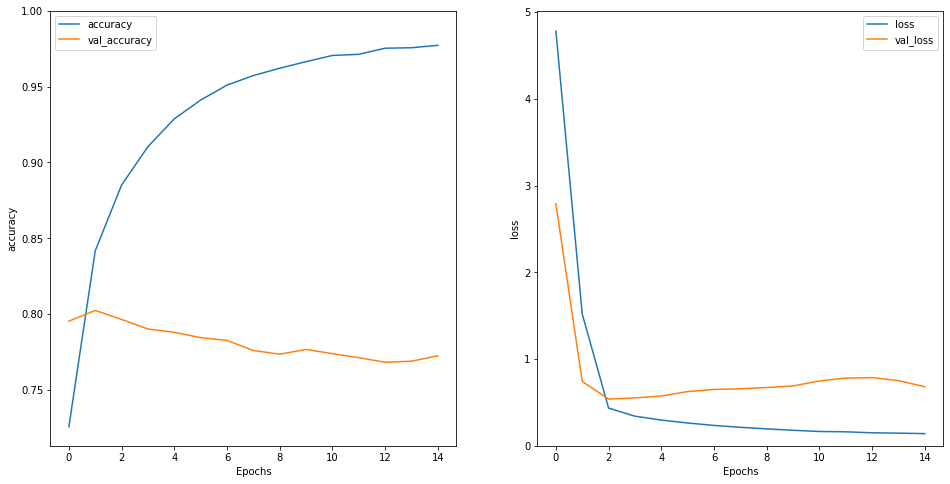

In [74]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

vis_dir = "../visuals/"
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)
plt.savefig(f'{vis_dir}_loss_acc.png')


In [ ]:
model.save(model_save_dir)


In [ ]:
loaded_model = load_model(model_save_dir)


In [ ]:
joblib.dump(tokenizer, f'{tokenizer_dir}.pkl')


In [ ]:
loaded_model.summary()

In [ ]:
loaded_tokenizer = joblib.load(f'{tokenizer_dir}.pkl')

In [ ]:
loaded_tokenizer
